In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from albatross.analysis import plot_windrose, boxplot

In [2]:
wt = pd.read_csv('../data/T1.csv')

In [3]:
wt

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [4]:
wt.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [74]:
speed = wt.loc[:, "Wind Speed (m/s)"]
direction = wt.loc[:, "Wind Direction (°)"]
active_power = wt.loc[:, "LV ActivePower (kW)"]
theoretical_power = wt.loc[:, "Theoretical_Power_Curve (KWh)"]

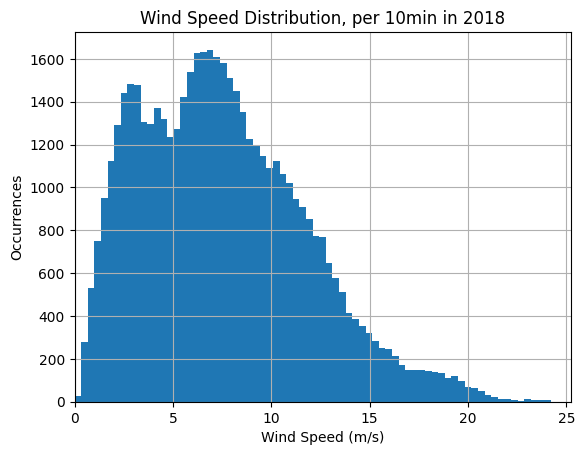

In [30]:
fig, ax = plt.subplots()

ax.set_title("Wind Speed Distribution, per 10min in 2018")
ax.set_xlabel("Wind Speed (m/s)")
ax.set_ylabel("Occurrences")
ax.set_xmargin(0)
ax.hist(speed, 75)
ax.grid(True)

<AxesSubplot: xlabel='Time (10min)', ylabel='Wind Speed (m/s)'>

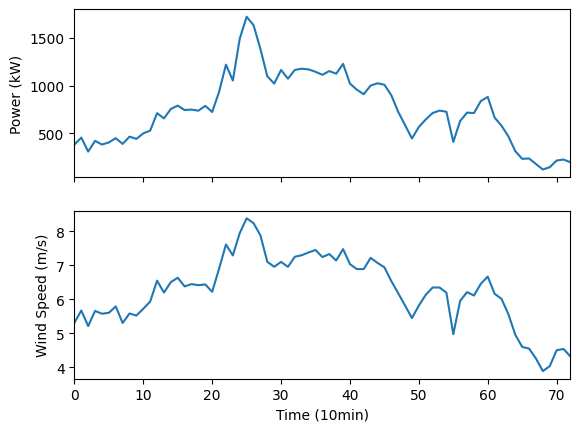

In [66]:
wt_2hr = wt.loc[:6*12, :]

ax1 = plt.subplot(211)
time = wt_2hr.loc[:, "Date/Time"]

ax1.plot(wt_2hr.index, wt_2hr.loc[:, "LV ActivePower (kW)"])
ax1.tick_params('x', labelbottom=False)
ax1.set_ylabel("Power (kW)")
ax1.set_xmargin(0)


ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(wt_2hr.index, wt_2hr.loc[:, "Wind Speed (m/s)"])
ax2.set_xlabel("Time (10min)")
ax2.set_ylabel("Wind Speed (m/s)")
ax2.set_xmargin(0)

ax2

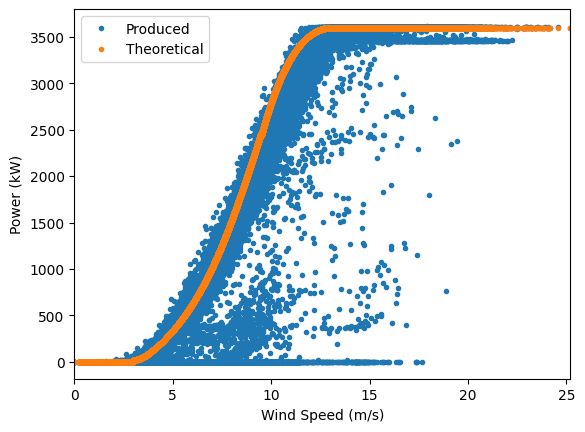

In [112]:
ax = plt.subplot()
ax.plot(speed, active_power, "o", markersize=3, label="Produced")
ax.plot(speed, theoretical_power, "o", markersize=3, label="Theoretical")
ax.set_xlabel("Wind Speed (m/s)")
ax.set_ylabel("Power (kW)")
ax.set_xmargin(0)
ax.legend()

<WindroseAxes: >

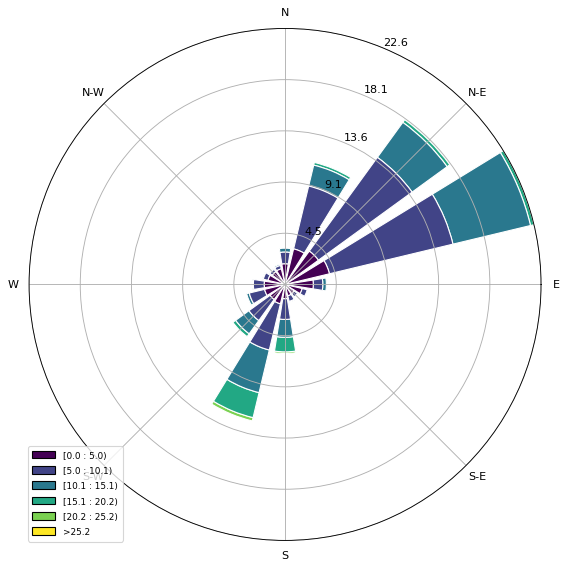

In [63]:
plot_windrose(wt, speed="Wind Speed (m/s)", direction="Wind Direction (°)")